In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Credit Card Transactions.csv")

In [4]:
data.shape

(5000, 23)

In [5]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [6]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [7]:
data[data==0].count()

Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
dtype: int64

In [8]:
data.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [9]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [10]:
li = list(data[data.Default_On_Payment == 0].sample(n=2000).index)

In [11]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

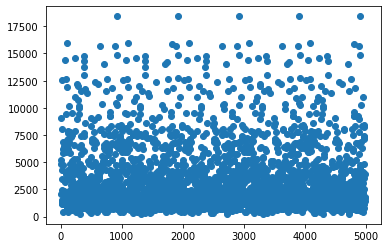

In [12]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])

In [13]:
li = list(data['Credit_Amount'].sort_values()[-5:].index)

In [14]:
data['Credit_Amount'][li] = int(data.drop(li)['Credit_Amount'].mean())

C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


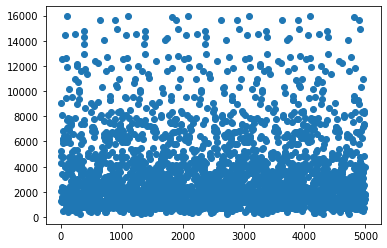

In [15]:
plt.scatter(data.index, data['Credit_Amount'])

In [16]:
data

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,A11,36,A32,A41,8229,A61,A73,2,A93,A101,...,A122,26,A143,A152,1,A173,2,A191,A201,1
4987,A14,13,A32,A43,1409,A62,A71,2,A92,A101,...,A121,64,A143,A152,1,A173,1,A191,A201,0
4989,A12,24,A34,A43,1743,A61,A75,4,A93,A101,...,A122,48,A143,A152,2,A172,1,A191,A201,0
4993,A11,36,A32,A42,3959,A61,A71,4,A93,A101,...,A122,30,A143,A152,1,A174,1,A192,A201,0


In [17]:
data.dtypes

Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
dtype: object

In [18]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,1


In [19]:
data.reset_index(drop=True,inplace=True)

In [20]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
2,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
3,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
4,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,1


In [21]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [22]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
1,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
2,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,0
3,1,30,4,0,5234,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,1
4,1,12,2,0,1295,0,1,3,1,0,...,2,25,2,0,1,2,1,0,0,1


In [22]:
data.dtypes

Status_Checking_Acc            int32
Duration_in_Months             int64
Credit_History                 int32
Purposre_Credit_Taken          int32
Credit_Amount                  int64
Savings_Acc                    int32
Years_At_Present_Employment    int32
Inst_Rt_Income                 int64
Marital_Status_Gender          int32
Other_Debtors_Guarantors       int32
Current_Address_Yrs            int64
Property                       int32
Age                            int64
Other_Inst_Plans               int32
Housing                        int32
Num_CC                         int64
Job                            int32
Dependents                     int64
Telephone                      int32
Foreign_Worker                 int32
Default_On_Payment             int64
dtype: object

In [23]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).sort_values()

Other_Inst_Plans                1.046764
Foreign_Worker                  1.060326
Marital_Status_Gender           1.070336
Other_Debtors_Guarantors        1.072180
Purposre_Credit_Taken           1.078963
Savings_Acc                     1.093649
Dependents                      1.104777
Status_Checking_Acc             1.167190
Current_Address_Yrs             1.193137
Num_CC                          1.212643
Years_At_Present_Employment     1.222927
Inst_Rt_Income                  1.275755
Credit_History                  1.280301
Age                             1.294491
Telephone                       1.303338
Housing                         1.320222
Job                             1.331046
Property                        1.403361
Duration_in_Months              1.794412
Credit_Amount                   2.137692
const                          58.662923
dtype: float64

In [26]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Credit_Amount                  1.627539e-202
Status_Checking_Acc            6.897915e-103
Duration_in_Months              2.116002e-42
Credit_History                  2.852878e-42
Savings_Acc                     2.733163e-32
Purposre_Credit_Taken           5.145191e-24
Age                             1.043746e-23
Property                        1.590358e-18
Years_At_Present_Employment     3.047285e-14
Housing                         5.339354e-13
Marital_Status_Gender           7.543667e-09
Foreign_Worker                  1.219741e-07
Other_Inst_Plans                1.469044e-07
Other_Debtors_Guarantors        5.062289e-04
Inst_Rt_Income                  2.222363e-03
Telephone                       1.705089e-02
Num_CC                          2.701605e-02
Job                             8.334908e-02
Dependents                      3.349490e-01
Current_Address_Yrs             6.423644e-01
const                           1.000000e+00
dtype: float64

In [29]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


const                            0.000000
Current_Address_Yrs             35.763558
Dependents                      66.505099
Job                             91.665092
Num_CC                          97.298395
Telephone                       98.294911
Inst_Rt_Income                  99.777764
Other_Debtors_Guarantors        99.949377
Other_Inst_Plans                99.999985
Foreign_Worker                  99.999988
Marital_Status_Gender           99.999999
Housing                        100.000000
Years_At_Present_Employment    100.000000
Savings_Acc                    100.000000
Credit_Amount                  100.000000
Purposre_Credit_Taken          100.000000
Property                       100.000000
Age                            100.000000
Credit_History                 100.000000
Duration_in_Months             100.000000
Status_Checking_Acc            100.000000
dtype: float64

In [27]:
import scipy.stats as stats
stats.f_oneway(X['Credit_Amount'],y)

F_onewayResult(statistic=3966.835756365732, pvalue=0.0)

In [28]:
stats.f_oneway(X['Age'],y)

F_onewayResult(statistic=28694.039371662493, pvalue=0.0)

In [30]:
Significance[Significance >= 99.9].index

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Marital_Status_Gender',
       'Other_Debtors_Guarantors', 'Property', 'Age', 'Other_Inst_Plans',
       'Housing', 'Foreign_Worker'],
      dtype='object')

In [31]:
X_ = X[Significance[Significance >= 99.9].index]

In [33]:
log = LogisticRegression()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33)

In [38]:
log.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
log.score(X_test,y_test)

0.7212121212121212

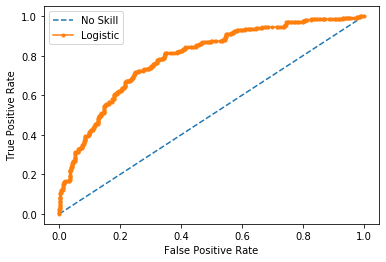

In [44]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = log.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
'''# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set
y_pred = gnb.predict(X_test) 
'''



from sklearn.naive_bayes import BernoulliNB 
bnb = BernoulliNB() 
bnb.fit(X_train, y_train) 

# making predictions on the testing set
y_pred = bnb.predict(X_test) 



# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 67.91666666666667
